In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Convert JSON to CSV file

In [3]:
data = pd.read_json("C:/Users/Asus/Desktop/Data Analytics Learning/Web_Scraping_for_DA/web scraping code/batting_data.json")

# convert json file to csv file:
data.to_csv("C:/Users/Asus/Desktop/Data Analytics Learning/DA Projects/Cricket t20 2024 Complete Analysis/unclean datasets/Batting_Summary T20 WC 2024.csv", index = False)

In [4]:
# convert bowling data json file to csv
data = pd.read_json("C:/Users/Asus/Desktop/Data Analytics Learning/Web_Scraping_for_DA/web scraping code/bowling_data.json")

# convert json file to csv file:
data.to_csv("C:/Users/Asus/Desktop/Data Analytics Learning/DA Projects/Cricket t20 2024 Complete Analysis/unclean datasets/Bowling_Summary T20 WC 2024.csv", index = False)

In [5]:
# convert players data json file to csv:
data = pd.read_json("C:/Users/Asus/Desktop/Data Analytics Learning/Web_Scraping_for_DA/web scraping code/player_info.json")

# convert json file to csv file:
# data.to_csv("C:/Users/Asus/Desktop/Data Analytics Learning/DA Projects/Cricket t20 2024 Complete Analysis/Player_Info T20 WC 2024.csv", index = False)

# Exploratory Data Analysis

In [7]:
# load all the datasets
summary = pd.read_excel("C:/Users/Asus/Desktop/Data Analytics Learning/DA Projects/Cricket t20 2024 Complete Analysis/unclean datasets/T20 Worldcup Matches.xlsx")
batting_summary = pd.read_excel("C:/Users/Asus/Desktop/Data Analytics Learning/DA Projects/Cricket t20 2024 Complete Analysis/unclean datasets/Batting_Summary T20 WC 2024.xlsx")
bowling_summary = pd.read_excel("C:/Users/Asus/Desktop/Data Analytics Learning/DA Projects/Cricket t20 2024 Complete Analysis/unclean datasets/Bowling_Summary T20 WC 2024.xlsx")
player_info = pd.read_csv("C:/Users/Asus/Desktop/Data Analytics Learning/DA Projects/Cricket t20 2024 Complete Analysis/Player_Info T20 WC 2024.csv")

### Cleaning and Transformation of Data


In [9]:
summary.rename({"Scorecard" : "Match_Id"}, axis = 1, inplace = True)
#display(summary)

summary.replace('United State Of America', 'United States of America', inplace = True)
summary

,Match No.,Match Date,Venue,1st Team,2nd Team,Stage,Toss Winning,Toss Decision,First Innings Score,Fall of wickets First Innings,...,Method,Won by,Winning Margin,Top Scorer,Highest Score,Best Bowler,Best Bowler Figure(Wickets Taken),Best Bowler Figure(Runs Recieved),Player Of The Match,Match_Id
0,1st,2024-06-01,"Grand Prairie Stadium, Dallas",Canada,United States of America,Group A,United States of America,Fielding,194,5,...,Normal Match,Wickets,7.0,Aaron Jones,94.0,Dilon Heyliger,1.0,19.0,Aaron Jones,T20I # 2632
1,2nd,2024-06-02,"Providence Stadium, Guyana",Papua New Guinea,West Indies,Group C,West Indies,Fielding,136,8,...,Normal Match,Wickets,5.0,Sese Bau,50.0,Andre Russell,2.0,19.0,Roston Chase,T20I # 2633
2,3rd,2024-06-02,"Kensington Oval, Bridgetown, Barbados",Oman,Namibia,Group B,Namibia,Fielding,109,10,...,Normal Match,Wickets,4.0,Jan Frylinck,45.0,Mehran Khan,3.0,7.0,David Wiese,T20I # 2634
3,4th,2024-06-03,"Nassau County International Cricket Stadium, N...",Sri Lanka,South Africa,Group D,Sri Lanka,Batting,77,10,...,Normal Match,Wickets,6.0,Quinton de Kock,20.0,Anrich Nortje,4.0,7.0,Anrich Nortje,T20I # 2635
4,5th,2024-06-03,"Providence Stadium, Guyana",Afghanistan,Uganda,Group C,Uganda,Fielding,183,5,...,Normal Match,Runs,125.0,Rahmanullah Gurbaz,76.0,Fazalhaq Farooqi,5.0,9.0,Fazalhaq Farooqi,T20I # 2636
5,6th,2024-06-04,"Kensington Oval, Bridgetown, Barbados",Scotland,England,Group B,Scotland,Batting,90,0,...,Rain,Rain,NaN,Rain,NaN,Rain,NaN,NaN,Rain,T20I # 2637
6,7th,2024-06-04,"Grand Prairie Stadium, Dallas",Nepal,Netherlands,Group D,Netherlands,Fielding,106,10,...,Normal Match,Wickets,6.0,Max O'Dowd,54.0,Tim Pringle,3.0,20.0,Tim Pringle,T20I # 2638
7,8th,2024-06-05,"Nassau County International Cricket Stadium, N...",Ireland,India,Group A,India,Fielding,96,10,...,Normal Match,Wickets,8.0,Rohit Sharma,52.0,Jasprit Bumrah,2.0,6.0,Jasprit Bumrah,T20I # 2639
8,9th,2024-06-05,"Providence Stadium, Guyana",Papua New Guinea,Uganda,Group C,Uganda,Fielding,77,10,...,Normal Match,Wickets,3.0,Riazat Ali Shah,33.0,Alpesh Ramjani,17.0,17.0,Riazat Ali Shah,T20I # 2640
9,10th,2024-06-05,"Kensington Oval, Bridgetown, Barbados",Australia,Oman,Group B,Oman,Fielding,164,5,...,Normal Match,Runs,39.0,Marcus Stoinis,67.0,Marcus Stoinis,3.0,19.0,Marcus Stoinis,T20I # 2641


In [10]:
# creating a new column:
batting_summary["out/not_out"] = batting_summary.dismissal.apply(lambda x: "not out" if x == 'not out' or x == 'retired hurt' else 'out')
batting_summary

# drop the column which is of no more use:
batting_summary.drop(columns = ['dismissal'], inplace = True)
batting_summary

,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out
0,India Vs South Africa,India,1,Rohit SharmaÂ (c),9,5,2,0,180,out
1,India Vs South Africa,India,2,Virat Kohli,76,59,6,2,128.81,out
2,India Vs South Africa,India,3,Rishabh PantÂ â€,0,2,0,0,0,out
3,India Vs South Africa,India,4,Suryakumar Yadav,3,4,0,0,75,out
4,India Vs South Africa,India,5,Axar Patel,47,31,1,4,151.61,out
...,...,...,...,...,...,...,...,...,...,...
847,Canada Vs United States of America,United States of America,3,Andries Gous,65,46,7,3,141.3,out
848,Canada Vs United States of America,United States of America,4,Aaron Jones,94,40,4,10,235,not out
849,Canada Vs United States of America,United States of America,5,Corey Anderson,3,5,0,0,60,not out
850,Scotland Vs England,Scotland,1,George Munsey,41,31,4,2,132.25,not out


In [11]:
# remove unwanted characters from the batsmanName:
batting_summary['batsmanName'] = batting_summary['batsmanName'].apply(lambda x: x.replace('Â', ''))
batting_summary['batsmanName'] = batting_summary['batsmanName'].apply(lambda x: x.replace('Â Â', ''))
batting_summary['batsmanName'] = batting_summary['batsmanName'].apply(lambda x: x.replace('â€', ''))
batting_summary['batsmanName'] = batting_summary['batsmanName'].apply(lambda x: x.replace('(c)', ''))
batting_summary['batsmanName'] = batting_summary['batsmanName'].apply(lambda x: x.replace('(vc)', ''))

# Removing extra spaces from 'batsmanName':
batting_summary['batsmanName'] = batting_summary['batsmanName'].str.strip()
batting_summary

,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out
0,India Vs South Africa,India,1,Rohit Sharma,9,5,2,0,180,out
1,India Vs South Africa,India,2,Virat Kohli,76,59,6,2,128.81,out
2,India Vs South Africa,India,3,Rishabh Pant,0,2,0,0,0,out
3,India Vs South Africa,India,4,Suryakumar Yadav,3,4,0,0,75,out
4,India Vs South Africa,India,5,Axar Patel,47,31,1,4,151.61,out
...,...,...,...,...,...,...,...,...,...,...
847,Canada Vs United States of America,United States of America,3,Andries Gous,65,46,7,3,141.3,out
848,Canada Vs United States of America,United States of America,4,Aaron Jones,94,40,4,10,235,not out
849,Canada Vs United States of America,United States of America,5,Corey Anderson,3,5,0,0,60,not out
850,Scotland Vs England,Scotland,1,George Munsey,41,31,4,2,132.25,not out


In [12]:
# To link all the tables, we need to add 'match_id' data to batting and bowling tables
# to do so, first we need to create a dictionary of all the match_ids for all matches:
match_ids_dict = {}

for index, row in summary.iterrows():
    key1 = row['1st Team'] + ' Vs ' + row['2nd Team']
    key2 = row['2nd Team'] + ' Vs ' + row['1st Team']

    match_ids_dict[key1] = row['Match_Id']
    match_ids_dict[key2] = row['Match_Id']

#match_ids_dict

# Now we'll link this to the tables:
batting_summary['Match_Id'] = batting_summary['match'].map(match_ids_dict)
display(batting_summary)

bowling_summary['Match_Id'] = bowling_summary['match'].map(match_ids_dict)
display(bowling_summary)

,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out,Match_Id
0,India Vs South Africa,India,1,Rohit Sharma,9,5,2,0,180,out,T20I # 2729
1,India Vs South Africa,India,2,Virat Kohli,76,59,6,2,128.81,out,T20I # 2729
2,India Vs South Africa,India,3,Rishabh Pant,0,2,0,0,0,out,T20I # 2729
3,India Vs South Africa,India,4,Suryakumar Yadav,3,4,0,0,75,out,T20I # 2729
4,India Vs South Africa,India,5,Axar Patel,47,31,1,4,151.61,out,T20I # 2729
...,...,...,...,...,...,...,...,...,...,...,...
847,Canada Vs United States of America,United States of America,3,Andries Gous,65,46,7,3,141.3,out,T20I # 2632
848,Canada Vs United States of America,United States of America,4,Aaron Jones,94,40,4,10,235,not out,T20I # 2632
849,Canada Vs United States of America,United States of America,5,Corey Anderson,3,5,0,0,60,not out,T20I # 2632
850,Scotland Vs England,Scotland,1,George Munsey,41,31,4,2,132.25,not out,T20I # 2637


,match,bowlingTeam,bowlerName,overs,maiden,runsConceded,wickets,economy,dotBalls,4s_Conceded,6s_Conceded,wides,noBalls,Match_Id
0,India Vs South Africa,South Africa,Marco Jansen,4.0,0,49,1,12.25,4,5,2,1,1,T20I # 2729
1,India Vs South Africa,South Africa,Keshav Maharaj,3.0,0,23,2,7.66,10,3,1,0,0,T20I # 2729
2,India Vs South Africa,South Africa,Kagiso Rabada,4.0,0,36,1,9.00,8,2,2,2,0,T20I # 2729
3,India Vs South Africa,South Africa,Aiden Markram,2.0,0,16,0,8.00,1,0,1,0,0,T20I # 2729
4,India Vs South Africa,South Africa,Anrich Nortje,4.0,0,26,2,6.50,7,2,0,2,0,T20I # 2729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,Scotland Vs England,England,Mark Wood,2.0,0,11,0,5.50,7,1,0,1,1,T20I # 2637
591,Scotland Vs England,England,Jofra Archer,2.0,0,12,0,6.00,6,1,0,0,0,T20I # 2637
592,Scotland Vs England,England,Adil Rashid,2.0,0,26,0,13.00,2,2,2,0,0,T20I # 2637
593,Scotland Vs England,England,Moeen Ali,2.0,0,15,0,7.50,3,2,0,0,0,T20I # 2637


In [13]:
# summary.to_csv("C:/Users/Asus/Desktop/Data Analytics Learning/DA Projects/Cricket t20 2024 Complete Analysis/Final Match Summary.csv", index = False, encoding='utf-8')
# batting_summary.to_csv("C:/Users/Asus/Desktop/Data Analytics Learning/DA Projects/Cricket t20 2024 Complete Analysis/Final Batting Summary.csv", index = False, encoding='utf-8')
# bowling_summary.to_csv("C:/Users/Asus/Desktop/Data Analytics Learning/DA Projects/Cricket t20 2024 Complete Analysis/Final Bowling Summary.csv", index = False, encoding='utf-8')

### EDA

In [15]:
# Check for the missing values:
missing_values = summary.isnull().sum()
print(missing_values)
print()
missing_values = batting_summary.isnull().sum()
print(missing_values)
print()
missing_values = bowling_summary.isnull().sum()
print(missing_values)
print()
missing_values = player_info.isnull().sum()
print(missing_values)

Match No.                            0
Match Date                           0
Venue                                0
1st Team                             0
2nd Team                             0
Stage                                0
Toss Winning                         0
Toss Decision                        0
First Innings Score                  0
Fall of wickets First Innings        0
Second Innings Score                 1
Fall of wickets Second Innings       1
Winners                              0
Method                               0
Won by                               0
Winning Margin                       1
Top Scorer                           0
Highest Score                        1
Best Bowler                          0
Best Bowler Figure(Wickets Taken)    1
Best Bowler Figure(Runs Recieved)    1
Player Of The Match                  0
Match_Id                             0
dtype: int64

match          0
teamInnings    0
battingPos     0
batsmanName    0
runs           0
ball

In [16]:
# Descriptive Statistics (basic stats and data distribution):
descriptive_stats = summary.describe(include = 'all')  # include all fields along with numerical fields 
pd.set_option('display.max_columns', None)    # Set Pandas display option to show all columns
display(descriptive_stats)

descriptive_stats = batting_summary.describe(include = 'all')  
display(descriptive_stats)

descriptive_stats = bowling_summary.describe(include = 'all') 
display(descriptive_stats)


,Match No.,Match Date,Venue,1st Team,2nd Team,Stage,Toss Winning,Toss Decision,First Innings Score,Fall of wickets First Innings,Second Innings Score,Fall of wickets Second Innings,Winners,Method,Won by,Winning Margin,Top Scorer,Highest Score,Best Bowler,Best Bowler Figure(Wickets Taken),Best Bowler Figure(Runs Recieved),Player Of The Match,Match_Id
count,52,52,52,52,52,52,52,52,52.000000,52.000000,51.000000,51.000000,52,52,52,51.000000,52,51.000000,52,51.000000,51.000000,52,52
unique,52,26,9,19,17,9,18,2,NaN,NaN,NaN,NaN,17,3,3,NaN,40,NaN,42,NaN,NaN,44,52
top,1st,2024-06-05,"Kensington Oval, Bridgetown, Barbados",India,England,Group C,England,Fielding,NaN,NaN,NaN,NaN,South Africa,Normal Match,Runs,NaN,Quinton de Kock,NaN,Rashid Khan,NaN,NaN,Adil Rashid,T20I # 2632
freq,1,3,9,6,7,10,6,42,NaN,NaN,NaN,NaN,8,48,26,NaN,3,NaN,3,NaN,NaN,2,1
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134.653846,7.384615,117.078431,5.803922,NaN,NaN,NaN,22.843137,NaN,53.627451,NaN,3.745098,17.156863,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.668037,2.293673,37.879199,3.117817,NaN,NaN,NaN,31.749250,NaN,19.125858,NaN,4.335173,8.490872,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,0.000000,39.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,20.000000,NaN,1.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.000000,5.000000,98.500000,3.000000,NaN,NaN,NaN,6.000000,NaN,42.500000,NaN,2.500000,11.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135.500000,7.000000,114.000000,6.000000,NaN,NaN,NaN,8.000000,NaN,50.000000,NaN,3.000000,17.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166.250000,10.000000,136.500000,8.000000,NaN,NaN,NaN,24.500000,NaN,64.500000,NaN,4.000000,21.000000,NaN,NaN


,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out,Match_Id
count,852,852,852.000000,852,852.000000,852.000000,852.000000,852.000000,852.0,852,852
unique,52,20,NaN,247,NaN,NaN,NaN,NaN,284.0,2,52
top,West Indies Vs New Zealand,Afghanistan,NaN,Aiden Markram,NaN,NaN,NaN,NaN,0.0,out,T20I # 2672
freq,22,68,NaN,9,NaN,NaN,NaN,NaN,123.0,679,22
mean,NaN,NaN,5.016432,NaN,14.248826,12.957746,1.127934,0.606808,NaN,NaN,NaN
std,NaN,NaN,2.867577,NaN,17.035501,11.933840,1.648649,1.178180,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,3.000000,NaN,2.000000,4.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,9.000000,9.000000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,NaN,7.000000,NaN,20.000000,18.000000,2.000000,1.000000,NaN,NaN,NaN


,match,bowlingTeam,bowlerName,overs,maiden,runsConceded,wickets,economy,dotBalls,4s_Conceded,6s_Conceded,wides,noBalls,Match_Id
count,595,595,595,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595
unique,52,20,162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52
top,Afghanistan Vs Australia,South Africa,Marco Jansen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T20I # 2717
freq,14,50,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
mean,NaN,NaN,NaN,3.065378,0.073950,21.317647,1.075630,7.437849,8.648739,1.615126,0.868908,0.677311,0.075630,NaN
std,NaN,NaN,NaN,1.065883,0.309083,10.086909,1.115846,3.694570,4.682798,1.335140,1.031307,0.979627,0.270915,NaN
min,NaN,NaN,NaN,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,2.000000,0.000000,14.000000,0.000000,5.000000,5.000000,1.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,3.200000,0.000000,20.000000,1.000000,6.750000,9.000000,1.000000,1.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,4.000000,0.000000,27.500000,2.000000,9.290000,12.000000,2.000000,1.000000,1.000000,0.000000,NaN


Overview of the datasets:
1. The dataset contains 52 matches whereas the remaining 3 matches were washed out due to rain.
2. Kensington Oval, Bridgetown, Barbados is the most frequent venue with 9 matches.
3. England has won the toss in 6 out of their 8 matches i.e. most by any team.
4. The "Top Scorer" & "Player of the Match" name appears multiple times, indicating consistent performance.
5. Average first innings score was 134 and average second innings score was 116.
6. Highest score in the tournament was 98, indicating that no centuries were made in this year's WC.
7. A bowler has bowled maximum 24 dot balls in a match stating all 4 maiden overs. (record created).

In [18]:
# Retrieve datatype for each column:
summary.info()
batting_summary.info()
bowling_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Match No.                          52 non-null     object 
 1   Match Date                         52 non-null     object 
 2   Venue                              52 non-null     object 
 3   1st Team                           52 non-null     object 
 4   2nd Team                           52 non-null     object 
 5   Stage                              52 non-null     object 
 6   Toss Winning                       52 non-null     object 
 7   Toss Decision                      52 non-null     object 
 8   First Innings Score                52 non-null     int64  
 9   Fall of wickets First Innings      52 non-null     int64  
 10  Second Innings Score               51 non-null     float64
 11  Fall of wickets Second Innings     51 non-null     float64
 

# Data Analysis for T20 World Cup 2024

26


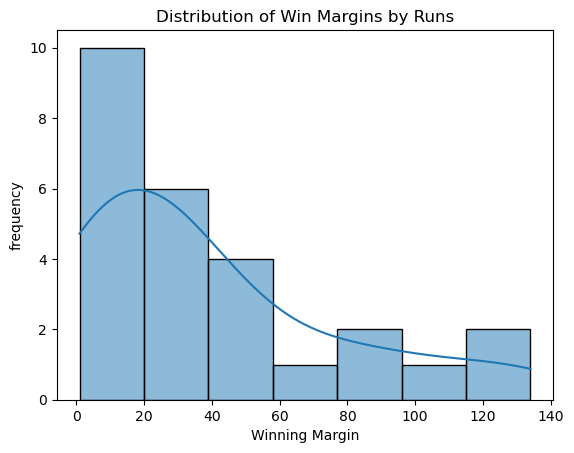

In [20]:
# Understanding the winning margin difference if won by runs:
winning_margin_runs = summary.loc[summary["Won by"] == 'Runs', 'Winning Margin']
print(winning_margin_runs.count())

sns.histplot(winning_margin_runs, kde = True, bins = 7)
plt.title('Distribution of Win Margins by Runs')
plt.ylabel('frequency')
plt.show()

**10 out of 26 matches won by runs was won by less than 20 runs stating that we didn't had a lot of close games.**

25


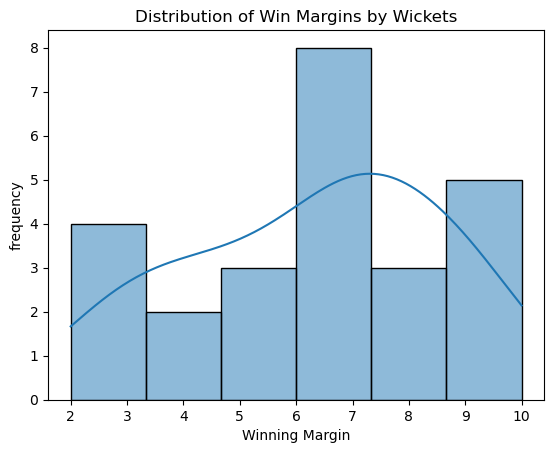

In [22]:
# Understanding the winning margin difference if won by wickets:
winning_margin_runs = summary.loc[summary["Won by"] == 'Wickets', 'Winning Margin']
print(winning_margin_runs.count())

sns.histplot(winning_margin_runs, kde = True)
plt.title('Distribution of Win Margins by Wickets')
plt.ylabel('frequency')
plt.show()

**8 out of 25 matches won by wickets won by 6-7 wickets in-hand meaning that the winning team was well placed in the game and it was no close encounter.**

Count of matches where Toss Winner won the match: 28


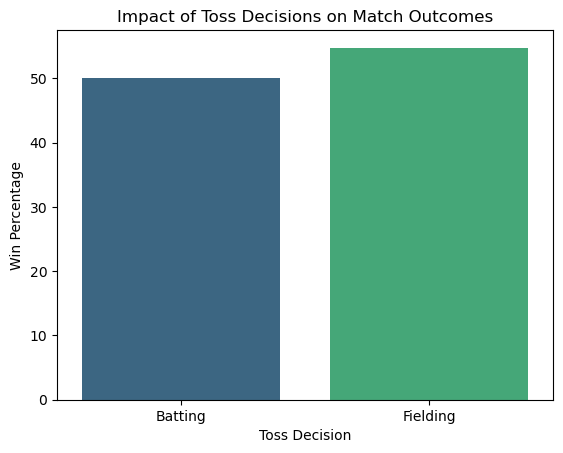

Toss Decision
Batting     50.000000
Fielding    54.761905
Name: Toss Win & Match Victory, dtype: float64


In [24]:
# Create a boolean column indicating if the toss winner also won the match:
summary['Toss Win & Match Victory'] = summary['Toss Winning'] == summary['Winners']

# Count only rows where 'Toss Win & Match Victory' is True:
toss_win_count = summary['Toss Win & Match Victory'].sum()  # sum() counts True values as 1, False as 0
print("Count of matches where Toss Winner won the match:", toss_win_count)

# Calculate the win percentage based on the toss decision (includes all 52 matches):
toss_decision_impact = summary.groupby('Toss Decision')['Toss Win & Match Victory'].mean() * 100

# Plot the impact of toss decisions on match outcomes:
sns.barplot(x = toss_decision_impact.index, y = toss_decision_impact.values, palette = 'viridis')
plt.title('Impact of Toss Decisions on Match Outcomes')
plt.xlabel('Toss Decision')
plt.ylabel('Win Percentage')
plt.show()

# Display the win percentages
print(toss_decision_impact)

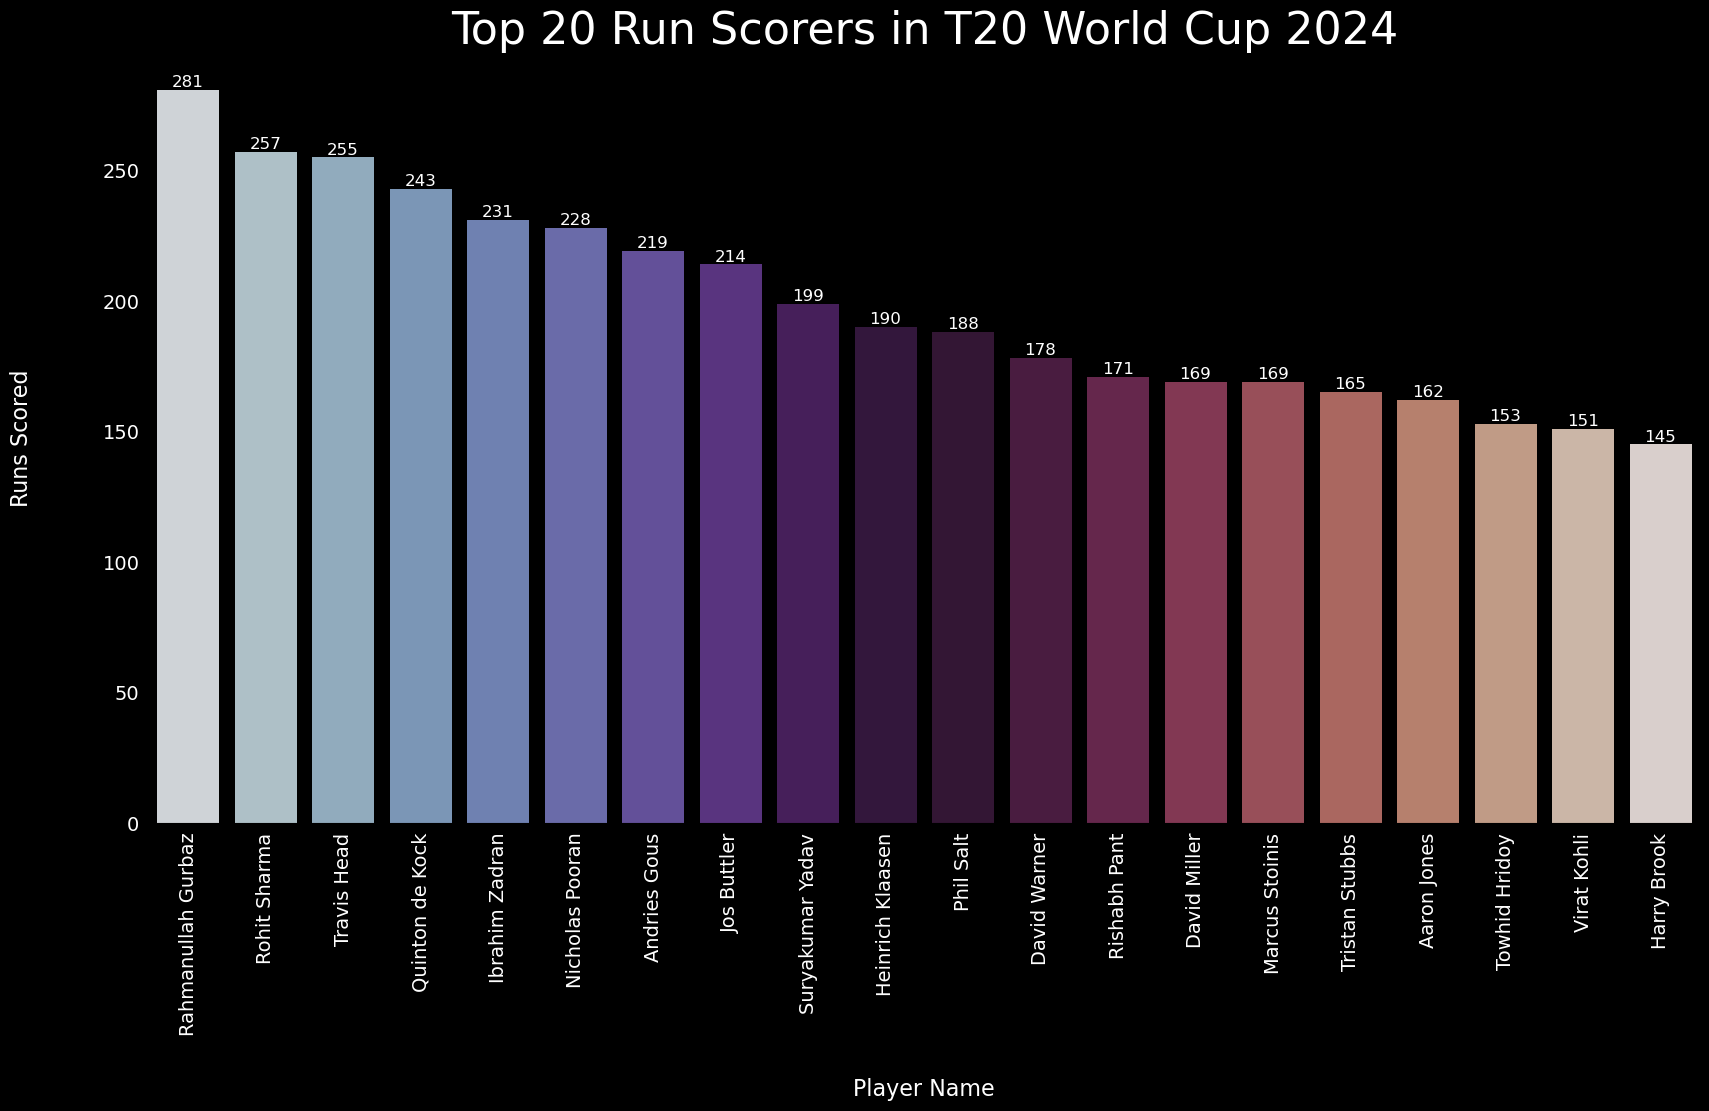

In [25]:
# Calculate total runs for each player:
df_run = batting_summary.groupby('batsmanName')['runs'].sum().reset_index(name = 'total_runs')

df_run = df_run.sort_values(by='total_runs', ascending=False).head(20)

plt.figure(figsize=[20, 10])

# Set black facecolor for the entire plot
plt.gcf().set_facecolor('black')

# Plot title
plt.title('Top 20 Run Scorers in T20 World Cup 2024', fontsize=32, color='white')  # White title for contrast

# Barplot
barplot = sns.barplot(data = df_run, x = 'batsmanName', y = 'total_runs', palette='twilight')

# Labels
plt.xlabel('Player Name', fontsize=16, labelpad=30, color='white')  # White labels for contrast
plt.ylabel('Runs Scored', fontsize=16, labelpad=50, color='white')

# Adjust tick labels
plt.xticks(rotation=90, fontsize=14, color='white')  # White tick labels for visibility
plt.yticks(fontsize=14, color='white')

# Add the number of runs on top of each bar
for i, bar in enumerate(plt.gca().patches):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{int(bar.get_height())}',
        ha='center', va='bottom', fontsize=12, color='white'  # White text for contrast
    )

barplot.set_facecolor('black')
plt.show()

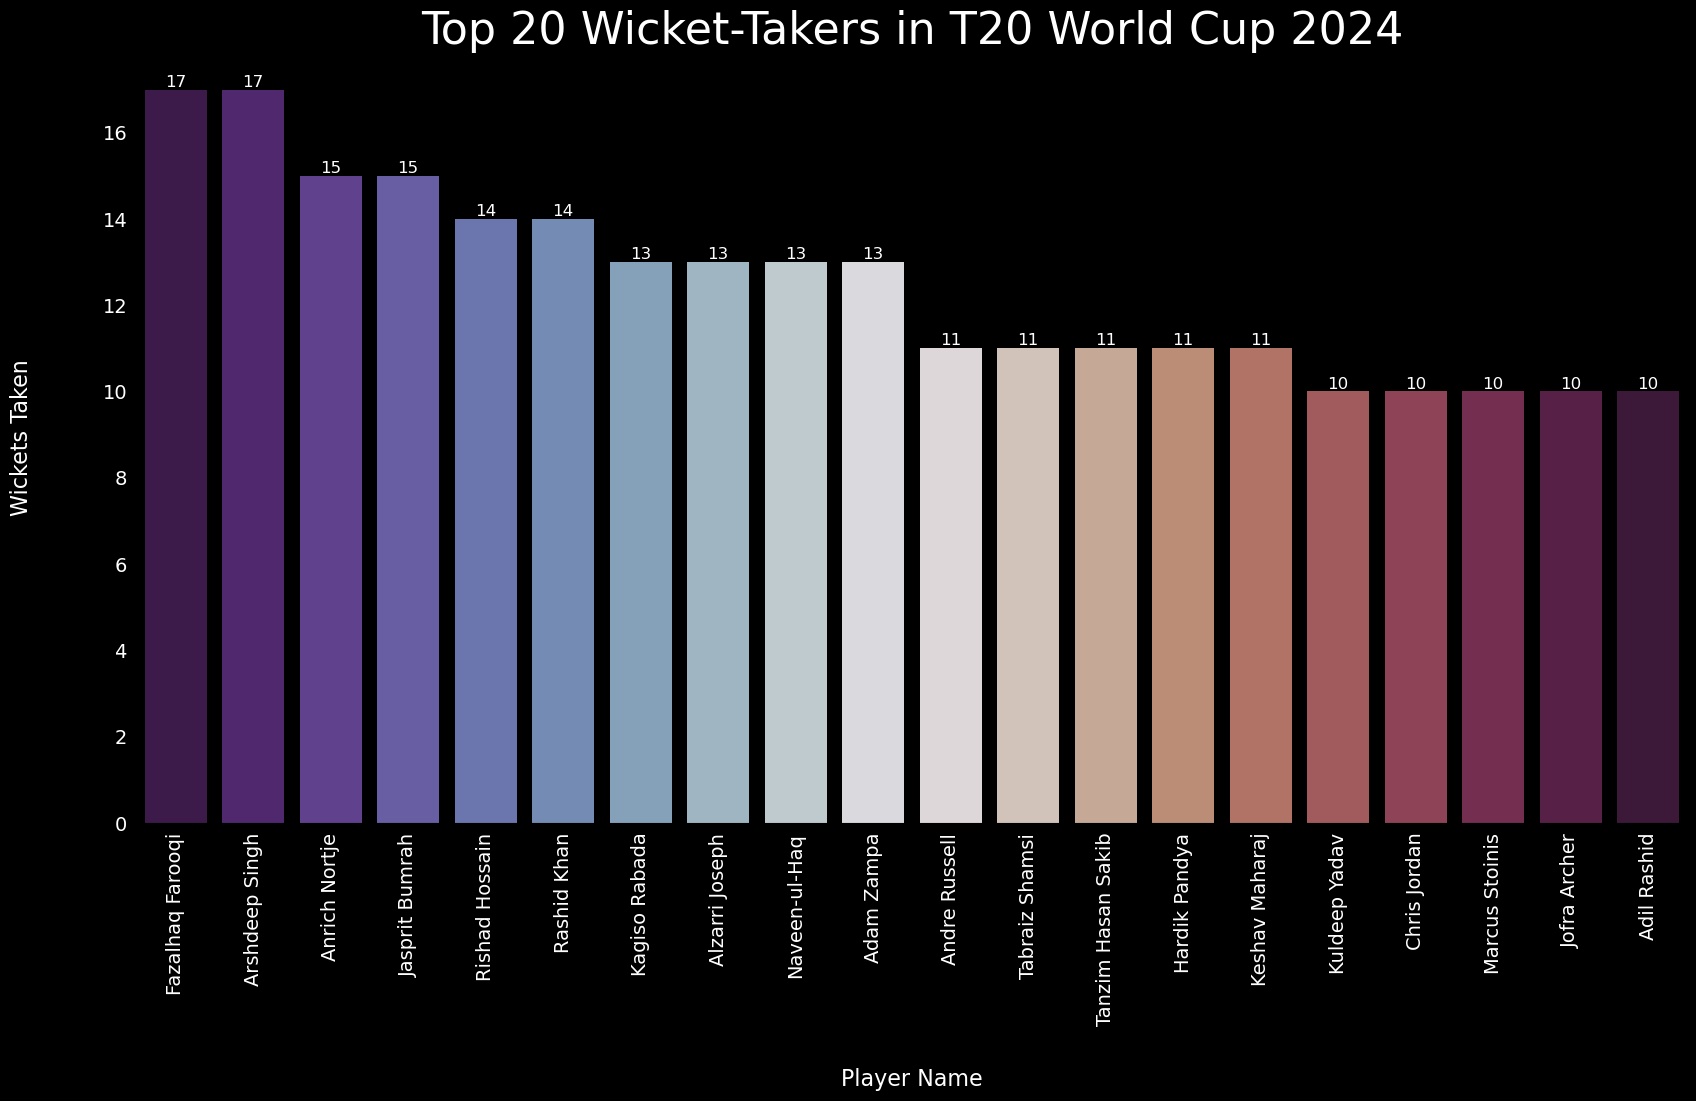

In [26]:
# Calculate total runs for each player:
df_wckt = bowling_summary.groupby('bowlerName')['wickets'].sum().reset_index(name = 'total_wickets')

df_wckt = df_wckt.sort_values(by='total_wickets', ascending=False).head(20)

plt.figure(figsize=[20, 10])

# Set black facecolor for the entire plot
plt.gcf().set_facecolor('black')

# Plot title
plt.title('Top 20 Wicket-Takers in T20 World Cup 2024', fontsize=32, color='white')  # White title for contrast

# Barplot
barplot = sns.barplot(data = df_wckt, x = 'bowlerName', y = 'total_wickets', palette='twilight_shifted')

# Labels
plt.xlabel('Player Name', fontsize=16, labelpad=30, color='white')  # White labels for contrast
plt.ylabel('Wickets Taken', fontsize=16, labelpad=50, color='white')

# Adjust tick labels
plt.xticks(rotation=90, fontsize=14, color='white')  # White tick labels for visibility
plt.yticks(fontsize=14, color='white')

# Add the number of runs on top of each bar
for i, bar in enumerate(plt.gca().patches):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{int(bar.get_height())}',
        ha='center', va='bottom', fontsize=12, color='white'  # White text for contrast
    )

barplot.set_facecolor('black')
plt.show()

# Creating New Tables Columns

In [28]:
# Calculating 'Runs % by Boundary' for each player:
def boundary_percent(group):
    total_runs = group['runs'].sum()  
    total_fours = group['4s'].sum() * 4  
    total_sixes = group['6s'].sum() * 6  
    if total_runs == 0 or pd.isna(total_runs):  # Avoid division by zero
        return 0
    return (total_fours + total_sixes) / total_runs * 100

# Apply the function for each group and create a new DataFrame
df_boundary = batting_summary.groupby('batsmanName').apply(boundary_percent).round(2).reset_index(name='runs % by boundary')
display(df_boundary)



,batsmanName,runs % by boundary
0,Aaron Johnson,80.90
1,Aaron Jones,71.60
2,Aasif Sheikh,66.67
3,Abbas Afridi,58.82
4,Abinash Bohara,0.00
...,...,...
242,Vivian Kingma,0.00
243,Wanindu Hasaranga,80.00
244,Will Jacks,53.33
245,Zane Green,34.48


In [29]:
# Calculating 'SR' each player, then round to 2 decimal places:
# Convert object datatype to numeric for SR column:
batting_summary['SR'] = pd.to_numeric(batting_summary['SR'], errors = 'coerce')

def calculate_sr(group):
    total_runs = group['runs'].sum()
    total_balls = group['balls'].sum()

    batting_sr = round((total_runs / total_balls) * 100, 2)
    return batting_sr

df_sr = batting_summary.groupby('batsmanName').apply(calculate_sr).reset_index(name = 'batting_sr')
display(df_sr)


# Calculating 'batting average' for each player:
# Step 1: Define a function to calculate the batting average for each player
def calculate_average(group):
    total_runs = group['runs'].sum()  # Total runs scored by the player
    innings = group['runs'].count()   # Total innings played by the player
    not_out_innings = (group['out/not_out'] == 'not out').sum()  # Count of "not out" innings
    
    # Adjust the denominator to exclude not-out innings
    effective_innings = innings - not_out_innings if innings > not_out_innings else 1  # Avoid division by zero
    batting_average = round(total_runs / effective_innings, 2)
    return batting_average

# Step 2: Group by 'batsmanName' and apply the custom average function
df_avg = batting_summary.groupby('batsmanName').apply(calculate_average).reset_index(name = 'batting_avg')

# Display the resulting DataFrame with batting averages
display(df_avg)


# To check for batting average of a particular player: 
rohit_avg = df_avg[df_avg['batsmanName'] == 'Rohit Sharma']
print(rohit_avg)

,batsmanName,batting_sr
0,Aaron Johnson,121.92
1,Aaron Jones,135.00
2,Aasif Sheikh,88.73
3,Abbas Afridi,80.95
4,Abinash Bohara,0.00
...,...,...
242,Vivian Kingma,100.00
243,Wanindu Hasaranga,222.22
244,Will Jacks,88.24
245,Zane Green,87.88


,batsmanName,batting_avg
0,Aaron Johnson,29.67
1,Aaron Jones,40.50
2,Aasif Sheikh,21.00
3,Abbas Afridi,17.00
4,Abinash Bohara,0.00
...,...,...
242,Vivian Kingma,1.00
243,Wanindu Hasaranga,10.00
244,Will Jacks,7.50
245,Zane Green,9.67


      batsmanName  batting_avg
192  Rohit Sharma        36.71


In [30]:
# Calculating avg balls faced by each batsman:
df_avg_balls = batting_summary.groupby('batsmanName')['balls'].mean().round().reset_index(name = 'avg_balls_faced')
display(df_avg_balls)

,batsmanName,avg_balls_faced
0,Aaron Johnson,24.0
1,Aaron Jones,20.0
2,Aasif Sheikh,24.0
3,Abbas Afridi,21.0
4,Abinash Bohara,1.0
...,...,...
242,Vivian Kingma,1.0
243,Wanindu Hasaranga,3.0
244,Will Jacks,8.0
245,Zane Green,11.0


In [31]:
# Calculating batting position of each player:
# Step 1: Calculate appearance counts for each batting position per player
batting_position_counts = (
    batting_summary
    .groupby(['batsmanName', 'battingPos'])
    .size()
    .reset_index(name='count')
)

# Step 2: Find the majority position for each player
majority_positions = (
    batting_position_counts
    .sort_values('count', ascending=False)
    .drop_duplicates(subset='batsmanName')
)

# Step 3: Keep only 'batsmanName' and 'majorityPosition' columns
df_position = majority_positions[['batsmanName', 'battingPos']].rename(columns={'battingPos': 'majorityPosition'})

# Display the resulting DataFrame
display(df_position)


,batsmanName,majorityPosition
386,Virat Kohli,2
278,Rahmanullah Gurbaz,1
292,Rishabh Pant,3
302,Rohit Sharma,1
7,Aiden Markram,3
...,...,...
212,Mark Chapman,6
214,Matt Henry,9
220,Michael Bracewell,7
57,Bilal Hassan,9


In [32]:
# Calculating total innings that a player has played this season:
df_innings = batting_summary.groupby('batsmanName')['runs'].count().reset_index(name = 'total_bat_innings')
display(df_innings)

# Calculating total runs scored by the batsman:
df_runs = batting_summary.groupby('batsmanName')['runs'].sum().reset_index(name = 'total_runs')
display(df_runs)

,batsmanName,total_bat_innings
0,Aaron Johnson,3
1,Aaron Jones,6
2,Aasif Sheikh,3
3,Abbas Afridi,1
4,Abinash Bohara,2
...,...,...
242,Vivian Kingma,1
243,Wanindu Hasaranga,3
244,Will Jacks,2
245,Zane Green,3


,batsmanName,total_runs
0,Aaron Johnson,89
1,Aaron Jones,162
2,Aasif Sheikh,63
3,Abbas Afridi,17
4,Abinash Bohara,0
...,...,...
242,Vivian Kingma,1
243,Wanindu Hasaranga,20
244,Will Jacks,15
245,Zane Green,29


In [33]:
# Adding calculated columns to the original dataset:
combined_df_batting = batting_summary.copy()

# Merge each calculated DataFrame into combined_df
calculated_dfs = [df_avg, df_sr, df_boundary, df_avg_balls, df_position, df_innings, df_runs]

for calc_df in calculated_dfs:
    combined_df_batting = combined_df_batting.merge(calc_df, on='batsmanName', how='left')

# combined_df_batting.drop(columns = 'Match_Id', inplace = True)
display(combined_df_batting)

# Save to CSV
combined_df_batting.to_csv('C:/Users/Asus/Desktop/Data Analytics Learning/DA Projects/Cricket t20 2024 Complete Analysis/complete_batting_summary.csv', index=False)


,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out,Match_Id,batting_avg,batting_sr,runs % by boundary,avg_balls_faced,majorityPosition,total_bat_innings,total_runs
0,India Vs South Africa,India,1,Rohit Sharma,9,5,2,0,180.00,out,T20I # 2729,36.71,156.71,72.37,20.0,1,8,257
1,India Vs South Africa,India,2,Virat Kohli,76,59,6,2,128.81,out,T20I # 2729,18.88,112.69,49.01,17.0,2,8,151
2,India Vs South Africa,India,3,Rishabh Pant,0,2,0,0,0.00,out,T20I # 2729,24.43,127.61,65.50,17.0,3,8,171
3,India Vs South Africa,India,4,Suryakumar Yadav,3,4,0,0,75.00,out,T20I # 2729,28.43,135.37,60.30,18.0,4,8,199
4,India Vs South Africa,India,5,Axar Patel,47,31,1,4,151.61,out,T20I # 2729,23.00,139.39,60.87,13.0,8,5,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,Canada Vs United States of America,United States of America,3,Andries Gous,65,46,7,3,141.30,out,T20I # 2632,43.80,151.03,66.67,24.0,2,6,219
848,Canada Vs United States of America,United States of America,4,Aaron Jones,94,40,4,10,235.00,not out,T20I # 2632,40.50,135.00,71.60,20.0,4,6,162
849,Canada Vs United States of America,United States of America,5,Corey Anderson,3,5,0,0,60.00,not out,T20I # 2632,16.50,91.67,33.33,14.0,5,5,66
850,Scotland Vs England,Scotland,1,George Munsey,41,31,4,2,132.25,not out,T20I # 2637,41.33,139.33,69.35,22.0,1,4,124


In [34]:
bowling_summary

,match,bowlingTeam,bowlerName,overs,maiden,runsConceded,wickets,economy,dotBalls,4s_Conceded,6s_Conceded,wides,noBalls,Match_Id
0,India Vs South Africa,South Africa,Marco Jansen,4.0,0,49,1,12.25,4,5,2,1,1,T20I # 2729
1,India Vs South Africa,South Africa,Keshav Maharaj,3.0,0,23,2,7.66,10,3,1,0,0,T20I # 2729
2,India Vs South Africa,South Africa,Kagiso Rabada,4.0,0,36,1,9.00,8,2,2,2,0,T20I # 2729
3,India Vs South Africa,South Africa,Aiden Markram,2.0,0,16,0,8.00,1,0,1,0,0,T20I # 2729
4,India Vs South Africa,South Africa,Anrich Nortje,4.0,0,26,2,6.50,7,2,0,2,0,T20I # 2729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,Scotland Vs England,England,Mark Wood,2.0,0,11,0,5.50,7,1,0,1,1,T20I # 2637
591,Scotland Vs England,England,Jofra Archer,2.0,0,12,0,6.00,6,1,0,0,0,T20I # 2637
592,Scotland Vs England,England,Adil Rashid,2.0,0,26,0,13.00,2,2,2,0,0,T20I # 2637
593,Scotland Vs England,England,Moeen Ali,2.0,0,15,0,7.50,3,2,0,0,0,T20I # 2637


In [35]:
# Define aggregation functions to calculate total values per player
def calculate_bowling_metrics(group):
    total_overs = group['overs'].sum()
    overs_int = group['overs'].apply(lambda x: int(x))        # Get integer part (whole overs)
    overs_balls = group['overs'].apply(lambda x: (x % 1) * 10) # Get decimal part (balls in incomplete over)

    # Calculate total balls bowled
    total_balls = (overs_int.sum() * 6) + overs_balls.sum()
    
    total_runs_conceded = group['runsConceded'].sum()
    total_wickets = group['wickets'].sum()

    # Bowling Average: Total Runs / Total Wickets
    bowling_avg = round(total_runs_conceded / total_wickets, 2) if total_wickets > 0 else 0

    # Bowling Strike Rate: Total Balls Bowled / Total Wickets
    bowling_sr = round(total_balls / total_wickets, 2) if total_wickets > 0 else 0

    # Bowling Economy: Total Runs / Total Overs
    bowling_ecn = round(total_runs_conceded / total_overs, 2) if total_overs > 0 else 0

    # Total Innings:
    total_innings = group['overs'].count()

    # Total Wickets:
    total_wickets = group['wickets'].sum()

    return pd.Series({
        'bowling_avg': bowling_avg,
        'bowling_sr': bowling_sr,
        'bowling_ecn': bowling_ecn,
        'total_bowl_innings': total_innings,
        'total_wickets': total_wickets
    })

# Group by 'bowlerName' and apply the metrics calculation function
df_bowling = bowling_summary.groupby('bowlerName').apply(calculate_bowling_metrics).reset_index()

# Display the final summary with bowling metrics for each player
display(df_bowling)

,bowlerName,bowling_avg,bowling_sr,bowling_ecn,total_bowl_innings,total_wickets
0,Abbas Afridi,0.00,0.00,10.33,1.0,0.0
1,Abinash Bohara,58.00,46.00,7.84,3.0,1.0
2,Adam Zampa,14.38,12.92,6.68,7.0,13.0
3,Adil Rashid,18.60,16.80,6.64,8.0,10.0
4,Aiden Markram,34.50,30.00,6.90,5.0,2.0
...,...,...,...,...,...,...
157,Vikramjit Singh,0.00,0.00,11.00,1.0,0.0
158,Vivian Kingma,26.00,26.00,6.00,4.0,3.0
159,Wanindu Hasaranga,13.17,11.33,7.05,3.0,6.0
160,Will Jacks,0.00,0.00,22.00,1.0,0.0


In [36]:
# Adding calculated columns to the original dataset:
combined_df_bowling = bowling_summary.copy()

combined_df_bowling = combined_df_bowling.merge(df_bowling, on='bowlerName', how='left')

# combined_df_bowling.drop(columns = 'Match_Id', inplace = True)
display(combined_df_bowling)

# Save to CSV
combined_df_bowling.to_csv('C:/Users/Asus/Desktop/Data Analytics Learning/DA Projects/Cricket t20 2024 Complete Analysis/complete_bowling_summary.csv', index=False)

,match,bowlingTeam,bowlerName,overs,maiden,runsConceded,wickets,economy,dotBalls,4s_Conceded,6s_Conceded,wides,noBalls,Match_Id,bowling_avg,bowling_sr,bowling_ecn,total_bowl_innings,total_wickets
0,India Vs South Africa,South Africa,Marco Jansen,4.0,0,49,1,12.25,4,5,2,1,1,T20I # 2729,30.43,26.71,6.85,9.0,7.0
1,India Vs South Africa,South Africa,Keshav Maharaj,3.0,0,23,2,7.66,10,3,1,0,0,T20I # 2729,15.91,15.27,6.25,8.0,11.0
2,India Vs South Africa,South Africa,Kagiso Rabada,4.0,0,36,1,9.00,8,2,2,2,0,T20I # 2729,15.00,14.31,6.29,9.0,13.0
3,India Vs South Africa,South Africa,Aiden Markram,2.0,0,16,0,8.00,1,0,1,0,0,T20I # 2729,34.50,30.00,6.90,5.0,2.0
4,India Vs South Africa,South Africa,Anrich Nortje,4.0,0,26,2,6.50,7,2,0,2,0,T20I # 2729,13.40,14.00,5.74,9.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,Scotland Vs England,England,Mark Wood,2.0,0,11,0,5.50,7,1,0,1,1,T20I # 2637,37.67,26.00,8.69,5.0,3.0
591,Scotland Vs England,England,Jofra Archer,2.0,0,12,0,6.00,6,1,0,0,0,T20I # 2637,19.00,15.80,7.25,8.0,10.0
592,Scotland Vs England,England,Adil Rashid,2.0,0,26,0,13.00,2,2,2,0,0,T20I # 2637,18.60,16.80,6.64,8.0,10.0
593,Scotland Vs England,England,Moeen Ali,2.0,0,15,0,7.50,3,2,0,0,0,T20I # 2637,24.33,18.00,8.11,4.0,3.0


### Merge tables with Player Info. table to create Dream Team based on Criterias.

In [38]:
# Joining complete_batting_summary and player_info:
df_complete_batting_summary = pd.read_csv('C:/Users/Asus/Desktop/Data Analytics Learning/DA Projects/Cricket t20 2024 Complete Analysis/complete_batting_summary.csv')

batting_player_info = player_info.rename(columns = {'name':'batsmanName'})
# display(batting_player_info)

complete_batting_summary = df_complete_batting_summary.merge(batting_player_info, on = 'batsmanName', how = 'left')
display(complete_batting_summary)

,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out,Match_Id,batting_avg,batting_sr,runs % by boundary,avg_balls_faced,majorityPosition,total_bat_innings,total_runs,team,role,age,batting_style,bowling_style
0,India Vs South Africa,India,1,Rohit Sharma,9,5,2,0,180.00,out,T20I # 2729,36.71,156.71,72.37,20.0,1,8,257,India,Top order Batter,37y,Right hand Bat,Right arm Offbreak
1,India Vs South Africa,India,2,Virat Kohli,76,59,6,2,128.81,out,T20I # 2729,18.88,112.69,49.01,17.0,2,8,151,India,Top order Batter,35y 177d,Right hand Bat,Right arm Medium
2,India Vs South Africa,India,3,Rishabh Pant,0,2,0,0,0.00,out,T20I # 2729,24.43,127.61,65.50,17.0,3,8,171,India,Wicketkeeper Batter,26y 209d,Left hand Bat,NaN
3,India Vs South Africa,India,4,Suryakumar Yadav,3,4,0,0,75.00,out,T20I # 2729,28.43,135.37,60.30,18.0,4,8,199,India,Batter,33y 229d,Right hand Bat,"Right arm Medium, Right arm Offbreak"
4,India Vs South Africa,India,5,Axar Patel,47,31,1,4,151.61,out,T20I # 2729,23.00,139.39,60.87,13.0,8,5,92,India,Allrounder,30y 101d,Left hand Bat,Slow Left arm Orthodox
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,Canada Vs United States of America,United States of America,3,Andries Gous,65,46,7,3,141.30,out,T20I # 2632,43.80,151.03,66.67,24.0,2,6,219,United States of America,Wicketkeeper Batter,30y 161d,Right hand Bat,NaN
848,Canada Vs United States of America,United States of America,4,Aaron Jones,94,40,4,10,235.00,not out,T20I # 2632,40.50,135.00,71.60,20.0,4,6,162,United States of America,Top order Batter,29y 197d,Right hand Bat,Legbreak Googly
849,Canada Vs United States of America,United States of America,5,Corey Anderson,3,5,0,0,60.00,not out,T20I # 2632,16.50,91.67,33.33,14.0,5,5,66,United States of America,Batting Allrounder,33y 142d,Left hand Bat,Left arm Medium fast
850,Scotland Vs England,Scotland,1,George Munsey,41,31,4,2,132.25,not out,T20I # 2637,41.33,139.33,69.35,22.0,1,4,124,Scotland,Opening Batter,31y 75d,Left hand Bat,Right arm Medium fast


In [39]:
# Joining complete_bowling_summary and player_info:
df_complete_bowling_summary = pd.read_csv('C:/Users/Asus/Desktop/Data Analytics Learning/DA Projects/Cricket t20 2024 Complete Analysis/complete_bowling_summary.csv')

bowling_player_info = player_info.rename(columns = {'name':'bowlerName'})
# display(bowling_player_info)

complete_bowling_summary = df_complete_bowling_summary.merge(bowling_player_info, on = 'bowlerName', how = 'left')
display(complete_bowling_summary)

,match,bowlingTeam,bowlerName,overs,maiden,runsConceded,wickets,economy,dotBalls,4s_Conceded,6s_Conceded,wides,noBalls,Match_Id,bowling_avg,bowling_sr,bowling_ecn,total_bowl_innings,total_wickets,team,role,age,batting_style,bowling_style
0,India Vs South Africa,South Africa,Marco Jansen,4.0,0,49,1,12.25,4,5,2,1,1,T20I # 2729,30.43,26.71,6.85,9.0,7.0,South Africa,Bowling Allrounder,23y 365d,Right hand Bat,Left arm Medium fast
1,India Vs South Africa,South Africa,Keshav Maharaj,3.0,0,23,2,7.66,10,3,1,0,0,T20I # 2729,15.91,15.27,6.25,8.0,11.0,South Africa,Bowler,34y 83d,Right hand Bat,Slow Left arm Orthodox
2,India Vs South Africa,South Africa,Kagiso Rabada,4.0,0,36,1,9.00,8,2,2,2,0,T20I # 2729,15.00,14.31,6.29,9.0,13.0,South Africa,Bowler,28y 341d,Left hand Bat,Right arm Fast
3,India Vs South Africa,South Africa,Aiden Markram,2.0,0,16,0,8.00,1,0,1,0,0,T20I # 2729,34.50,30.00,6.90,5.0,2.0,South Africa,Opening Batter,29y 209d,Right hand Bat,Right arm Offbreak
4,India Vs South Africa,South Africa,Anrich Nortje,4.0,0,26,2,6.50,7,2,0,2,0,T20I # 2729,13.40,14.00,5.74,9.0,15.0,South Africa,Bowler,30y 166d,Right hand Bat,Right arm Fast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,Scotland Vs England,England,Mark Wood,2.0,0,11,0,5.50,7,1,0,1,1,T20I # 2637,37.67,26.00,8.69,5.0,3.0,England,Bowler,34y 110d,Right hand Bat,Right arm Fast
591,Scotland Vs England,England,Jofra Archer,2.0,0,12,0,6.00,6,1,0,0,0,T20I # 2637,19.00,15.80,7.25,8.0,10.0,England,Bowler,29y 29d,Right hand Bat,Right arm Fast
592,Scotland Vs England,England,Adil Rashid,2.0,0,26,0,13.00,2,2,2,0,0,T20I # 2637,18.60,16.80,6.64,8.0,10.0,England,Bowler,36y 73d,Right hand Bat,Legbreak
593,Scotland Vs England,England,Moeen Ali,2.0,0,15,0,7.50,3,2,0,0,0,T20I # 2637,24.33,18.00,8.11,4.0,3.0,England,Batting Allrounder,36y 317d,Left hand Bat,Right arm Offbreak


In [40]:
bowling_player = df_complete_bowling_summary.rename(columns = {'bowlerName':'playerName'})
batting_player = df_complete_batting_summary.rename(columns = {'batsmanName':'playerName'})
all_player_info = player_info.rename(columns = {'name':'playerName'})
# display(all_player_info)
# display(bowling_player)
# display(batting_player)

half_merge = batting_player.merge(bowling_player, on = 'playerName', how = 'outer')
all_players = half_merge.merge(all_player_info, on = 'playerName', how = 'outer')
display(all_players)

,match_x,teamInnings,battingPos,playerName,runs,balls,4s,6s,SR,out/not_out,Match_Id_x,batting_avg,batting_sr,runs % by boundary,avg_balls_faced,majorityPosition,total_bat_innings,total_runs,match_y,bowlingTeam,overs,maiden,runsConceded,wickets,economy,dotBalls,4s_Conceded,6s_Conceded,wides,noBalls,Match_Id_y,bowling_avg,bowling_sr,bowling_ecn,total_bowl_innings,total_wickets,team,role,age,batting_style,bowling_style
0,Canada Vs Pakistan,Canada,1.0,Aaron Johnson,52.0,44.0,4.0,4.0,118.18,out,T20I # 2665,29.67,121.92,80.90,24.0,1.0,3.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,Batter,33y 47d,Right hand Bat,Right arm Offbreak
1,Canada Vs Ireland,Canada,1.0,Aaron Johnson,14.0,13.0,3.0,0.0,107.69,out,T20I # 2644,29.67,121.92,80.90,24.0,1.0,3.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,Batter,33y 47d,Right hand Bat,Right arm Offbreak
2,Canada Vs United States of America,Canada,1.0,Aaron Johnson,23.0,16.0,5.0,0.0,143.75,out,T20I # 2632,29.67,121.92,80.90,24.0,1.0,3.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,Batter,33y 47d,Right hand Bat,Right arm Offbreak
3,United States of America Vs England,United States of America,4.0,Aaron Jones,10.0,16.0,2.0,0.0,62.50,out,T20I # 2719,40.50,135.00,71.60,20.0,4.0,6.0,162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,Top order Batter,29y 197d,Right hand Bat,Legbreak Googly
4,United States of America Vs West Indies,United States of America,4.0,Aaron Jones,11.0,11.0,0.0,1.0,100.00,out,T20I # 2713,40.50,135.00,71.60,20.0,4.0,6.0,162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,Top order Batter,29y 197d,Right hand Bat,Legbreak Googly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,Australia Vs Oman,Oman,4.0,Zeeshan Maqsood,1.0,7.0,0.0,0.0,14.28,out,T20I # 2641,6.75,75.00,59.26,9.0,4.0,4.0,27.0,Australia Vs Oman,Oman,1.0,0.0,12.0,0.0,12.0,0.0,2.0,0.0,0.0,0.0,T20I # 2641,0.0,0.0,9.2,3.0,0.0,Oman,Opening Batter,36y 190d,Left hand Bat,Slow Left arm Orthodox
2299,Australia Vs Oman,Oman,4.0,Zeeshan Maqsood,1.0,7.0,0.0,0.0,14.28,out,T20I # 2641,6.75,75.00,59.26,9.0,4.0,4.0,27.0,Oman Vs Namibia,Oman,2.0,0.0,12.0,0.0,6.0,4.0,1.0,0.0,0.0,0.0,T20I # 2634,0.0,0.0,9.2,3.0,0.0,Oman,Opening Batter,36y 190d,Left hand Bat,Slow Left arm Orthodox
2300,Oman Vs Namibia,Oman,4.0,Zeeshan Maqsood,22.0,20.0,4.0,0.0,110.00,out,T20I # 2634,6.75,75.00,59.26,9.0,4.0,4.0,27.0,Oman Vs Scotland,Oman,2.0,0.0,22.0,0.0,11.0,4.0,2.0,1.0,0.0,0.0,T20I # 2659,0.0,0.0,9.2,3.0,0.0,Oman,Opening Batter,36y 190d,Left hand Bat,Slow Left arm Orthodox
2301,Oman Vs Namibia,Oman,4.0,Zeeshan Maqsood,22.0,20.0,4.0,0.0,110.00,out,T20I # 2634,6.75,75.00,59.26,9.0,4.0,4.0,27.0,Australia Vs Oman,Oman,1.0,0.0,12.0,0.0,12.0,0.0,2.0,0.0,0.0,0.0,T20I # 2641,0.0,0.0,9.2,3.0,0.0,Oman,Opening Batter,36y 190d,Left hand Bat,Slow Left arm Orthodox


# **Creating Dream Team**

In [42]:
# Best openers (2 required)
# Filter openers based on the given conditions
filtered_openers = complete_batting_summary[
    (complete_batting_summary['total_bat_innings'] >= 4) &  
    (complete_batting_summary['batting_avg'] > 25) & 
    (complete_batting_summary['batting_sr'] > 140) & 
    (complete_batting_summary['runs % by boundary'] > 60) & 
    (complete_batting_summary['majorityPosition'] < 4)
]

openers = filtered_openers.drop_duplicates(subset = 'batsmanName')
display(openers[['majorityPosition', 'batsmanName', 'team', 'batting_avg', 'batting_sr',
                'runs % by boundary', 'avg_balls_faced', 'total_bat_innings', 'role']])

,majorityPosition,batsmanName,team,batting_avg,batting_sr,runs % by boundary,avg_balls_faced,total_bat_innings,role
0,1,Rohit Sharma,India,36.71,156.71,72.37,20.0,8,Top order Batter
9,1,Quinton de Kock,South Africa,27.00,140.46,66.67,19.0,9,Wicketkeeper Batter
27,1,Phil Salt,England,37.60,159.32,65.96,17.0,7,Wicketkeeper Batter
28,2,Jos Buttler,England,42.80,158.52,69.16,19.0,7,Wicketkeeper Batter
78,2,Travis Head,Australia,42.50,158.39,76.08,23.0,7,Top order Batter
88,3,Nicholas Pooran,West Indies,38.00,146.15,71.05,22.0,7,Wicketkeeper Batter
106,2,Andries Gous,United States of America,43.80,151.03,66.67,24.0,6,Wicketkeeper Batter


Based on **runs % by boundary**, our **top 2 openers** are going to be:
1. **Travis Head**
2. **Rohit Sharma**

In [44]:
# Best anchors (3 required)
# Filter middle order/anchors based on the given conditions
filtered_anchors = complete_batting_summary[
    (complete_batting_summary['total_bat_innings'] >= 4) &  
    (complete_batting_summary['batting_avg'] > 35) & 
    (complete_batting_summary['batting_sr'] > 130) & 
    (complete_batting_summary['avg_balls_faced'] > 20) & 
    (complete_batting_summary['majorityPosition'] > 2)
]

anchors = filtered_anchors.drop_duplicates(subset = 'batsmanName')
display(anchors[['majorityPosition', 'batsmanName','team', 'batting_avg', 'batting_sr',
                'runs % by boundary', 'avg_balls_faced', 'total_bat_innings', 'role']])

,majorityPosition,batsmanName,team,batting_avg,batting_sr,runs % by boundary,avg_balls_faced,total_bat_innings,role
31,5,Harry Brook,England,72.50,157.61,52.41,23.0,4,Batter
81,5,Marcus Stoinis,Australia,42.25,164.08,68.64,21.0,5,Batting Allrounder
88,3,Nicholas Pooran,West Indies,38.00,146.15,71.05,22.0,7,Wicketkeeper Batter


In [45]:
# Best finisher (1 required)
# Filter finishers based on the given conditions
filtered_finisher = all_players[
    (all_players['total_bat_innings'] >= 4) &  
    (all_players['batting_avg'] > 20) & 
    (all_players['batting_sr'] > 145) & 
    (all_players['avg_balls_faced'] > 12) & 
    (all_players['majorityPosition'] > 4) &
    (all_players['total_bowl_innings'] >= 3)
]

finisher = filtered_finisher.drop_duplicates(subset = 'playerName')
display(finisher[['majorityPosition', 'playerName', 'batting_avg', 'batting_sr',
                'runs % by boundary', 'avg_balls_faced', 'total_bat_innings', 'total_bowl_innings',
                'bowling_avg', 'bowling_sr', 'bowling_ecn', 'role']])

,majorityPosition,playerName,batting_avg,batting_sr,runs % by boundary,avg_balls_faced,total_bat_innings,total_bowl_innings,bowling_avg,bowling_sr,bowling_ecn,role
773,6.0,Hardik Pandya,48.00,151.58,68.06,16.0,6.0,8.0,17.36,13.64,7.64,Allrounder
1273,5.0,Marcus Stoinis,42.25,164.08,68.64,21.0,5.0,6.0,15.10,10.20,8.88,Batting Allrounder


Marcus Stoinis is already in our team and hence **Hardik Pandya** will be our finisher.

In [47]:
# Lower order/Allrounder spinners (2 required)
# Filter spinners based on the given conditions
filtered_spinners = all_players[
    (all_players['total_bat_innings'] >= 2) &  
    (all_players['batting_avg'] > 15) & 
    (all_players['batting_sr'] > 120) & 
    (all_players['bowling_sr'] < 18) & 
    (all_players['bowling_ecn'] < 8) &
    (all_players['total_bowl_innings'] >= 4) &
    (all_players['bowling_style'].str.contains('Googly|Offbreak|Orthodox|Wrist', regex = True))
]

spinners = filtered_spinners.drop_duplicates(subset = 'playerName')
display(spinners[['majorityPosition', 'playerName', 'batting_avg', 'batting_sr',
                'runs % by boundary', 'avg_balls_faced', 'total_bat_innings', 'total_bowl_innings',
                'bowling_avg', 'bowling_sr', 'bowling_ecn', 'role', 'total_wickets', 'bowling_style']])

,majorityPosition,playerName,batting_avg,batting_sr,runs % by boundary,avg_balls_faced,total_bat_innings,total_bowl_innings,bowling_avg,bowling_sr,bowling_ecn,role,total_wickets,bowling_style
271,8.0,Axar Patel,23.0,139.39,60.87,13.0,5.0,8.0,19.22,14.67,7.86,Allrounder,9.0,Slow Left arm Orthodox
1890,4.0,Roston Chase,47.0,130.56,55.32,24.0,3.0,5.0,11.43,12.86,5.33,Allrounder,7.0,Right arm Offbreak


**Axar** is a genuine lower order allrounder and **Roston** has good stats compared to others.

In [49]:
# Best fast bowlers (3 required)
# Filter fast bowlers based on the given conditions
filtered_fast_bowlers = complete_bowling_summary[
    (complete_bowling_summary['total_bowl_innings'] >= 4) &  
    (complete_bowling_summary['bowling_avg'] < 20) & 
    (complete_bowling_summary['bowling_sr'] < 14) & 
    (complete_bowling_summary['bowling_ecn'] < 7) & 
    (complete_bowling_summary['bowling_style'].str.contains('Fast|Medium|fast'))
]

fast_bowlers = filtered_fast_bowlers.drop_duplicates(subset = 'bowlerName')
display(fast_bowlers[['bowlerName', 'team', 'total_bowl_innings', 'bowling_avg', 'bowling_sr', 
                      'bowling_ecn', 'role', 'total_wickets', 'bowling_style']])

,bowlerName,team,total_bowl_innings,bowling_avg,bowling_sr,bowling_ecn,role,total_wickets,bowling_style
7,Jasprit Bumrah,India,8.0,8.27,11.87,4.22,Bowler,15.0,Right arm Fast
29,Naveen-ul-Haq,Afghanistan,8.0,12.31,12.31,6.15,Bowler,13.0,Right arm Medium fast
30,Fazalhaq Farooqi,Afghanistan,8.0,9.41,8.94,6.35,Bowler,17.0,Left arm Fast medium
33,Gulbadin Naib,Afghanistan,4.0,6.71,7.71,5.22,Batting Allrounder,7.0,Right arm Medium fast
34,Tanzim Hasan Sakib,Bangladesh,7.0,13.55,13.09,6.21,Bowler,11.0,Right arm Fast medium
190,Trent Boult,New Zealand,4.0,6.56,10.67,3.69,Bowler,9.0,Left arm Fast medium
192,Lockie Ferguson,New Zealand,4.0,9.14,13.71,4.00,Bowler,7.0,Right arm Fast
227,Mohammad Amir,Pakistan,4.0,10.29,13.71,4.50,Bowler,7.0,Left arm Fast medium
228,Haris Rauf,Pakistan,4.0,14.43,12.86,6.73,Bowler,7.0,Right arm Fast


By taking the average of bowling_ecn and bowling_sr, we get to know how well a bowler has performed throughout the tournament.
Also, as from this stat we can see that *Gulbadin Naib* is pick of the bowler but when we get into details, we come to know that he has only bowled 9 overs, which are very much less than the other bowlers in the list. And hence, he wouldn't make in our dream team.  
So, the final list of top 3 fast bowlers are:
1. **Jasprit Bumrah**
2. **Fazalhaq Farooqi**
3. **Trent Boult**

#### **Final Dream Team**
1. **Travis Head**
2. **Rohit Sharma**
3. **Nicholas Pooran**
4. **Harry Brook**
5. **Marcus Stoinis**
6. **Hardik Pandya**
7. **Roston Chase**
8. **Axar Patel**
9. **Jasprit Bumrah**
10. **Trent Boult**
11. **Fazalhaq Farooqi**

Squad is of 15 players and hence based on players performance, we've got **4** reserves.  
These are:  
1. **Jos Buttler**  
2. **Andries Gous**  
3. **Andre Russell**  
4. **Rashid Khan**

## *Hence with this, we've reached the End of this Notebook Analysis and we'll continue visualizing this in Power BI. Stay with me !*